In [217]:
#------------------------------------Statistics Training Day 4-------------------------------------------
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [218]:
#Create 5 random points
#one experiment
r = np.random.rand(2,5); print r
mean_r = np.mean(r); print mean_r



#Now do this a BUNCH of times (for loop it!)

number = 1000
iterations= 10000
MeanR1 = []; R1 = [];MeanR2 = []; R2 = [];STD_R1= [];STD_R2= []
for ii in range(0,iterations):
    Rand1 = np.random.rand(number)
    Rand2 = np.random.rand(number)
    R_avg1 = np.mean(Rand1)
    R_avg2 = np.mean(Rand2)
    MeanR1.append(R_avg1); #fills average random values to an array
    MeanR2.append(R_avg2);
    R1.append(Rand1)
    R2.append(Rand2)
    R_STD1 = np.std(Rand1,ddof=1) 
    R_STD2 = np.std(Rand2,ddof=1)
    STD_R1.append(R_STD1) #fills std_dev of random values to an array
    STD_R2.append(R_STD2)

R = [R1,R2]
STD_R = [STD_R1,STD_R2]



#Let's plot a histogram of the error
#error in x = mean-center
MeanR1= np.array(MeanR1)
MeanR2= np.array(MeanR2)

center = [np.linspace(0.5,0.5,iterations),np.linspace(0.5,0.5,iterations)]
MeanR = [MeanR1,MeanR2]
Error_X = np.abs(np.subtract(MeanR, center))


STD_over_N_R = np.divide(STD_R , np.sqrt(number))

[[ 0.08144386  0.8996832   0.44768729  0.23848792  0.42878734]
 [ 0.17989058  0.94060838  0.34314719  0.99566803  0.75296716]]
0.530837095419


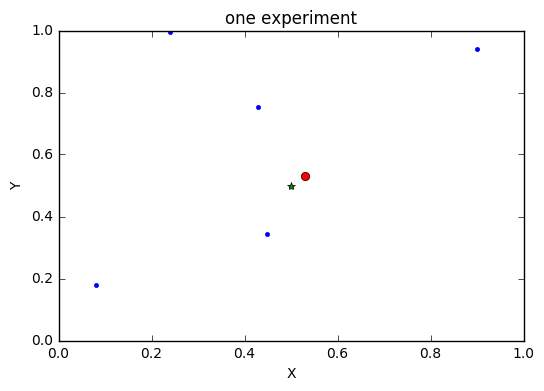

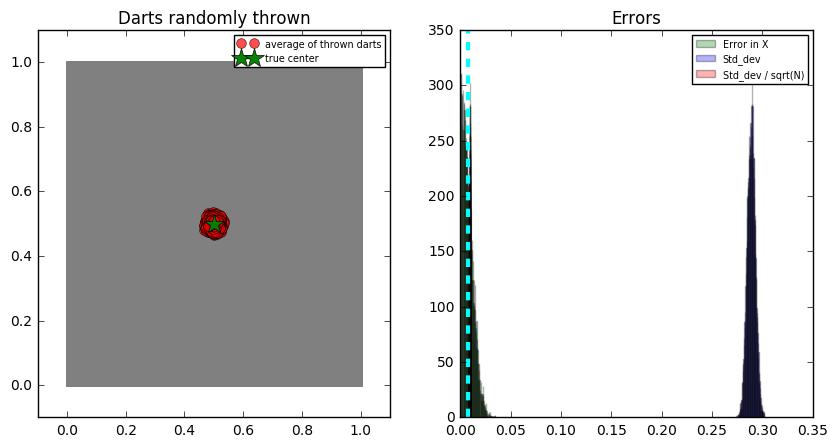

In [219]:
plt.plot(r[0],r[1], marker='.', linestyle='none')
plt.plot(0.5,0.5,marker='*')
plt.plot(mean_r,mean_r,marker='o', color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('one experiment')
plt.show()

Mean_of_Error_X = np.mean(Error_X[0])

fig = plt.figure(figsize=(10,5))

bx = fig.add_subplot(121)
bx.plot(R1,R2, marker='.', linestyle='none', color='grey',markersize=3,alpha=0.3)
bx.plot(MeanR1, MeanR2, marker='o', color='red',linestyle='none', markersize = 7,alpha=0.7, label='average of thrown darts' )
bx.plot(0.5,0.5,marker='*', markersize=15, color='green', alpha = 10, label='true center')
bx.set_xlim(-0.1,1.1)
bx.set_ylim(-0.1,1.1)
bx.set_title("Darts randomly thrown")
bx.legend(loc='upper right',fontsize = 'x-small')

ax = fig.add_subplot(122)    # The big subplot
ax.hist(Error_X[0], bins=100, label='Error in X', alpha=0.3, color='green')
ax.hist(STD_R[0], bins=100, label='Std_dev', alpha=0.3, color='blue')
ax.hist(STD_over_N_R[0], bins=100, label='Std_dev / sqrt(N)', alpha=0.3, color='red')
ax.axvline(x=Mean_of_Error_X, color='cyan', linewidth=3, linestyle='--')
ax.set_title("Errors")
ax.legend(loc='upper right',fontsize = 'x-small')

plt.show()

In [220]:
#------------------------------------From Day 3------------------------------------------------------------------------

#From Day 2:
data = np.loadtxt('hipparchos_subsample.dat')
data_range = np.arange(0,9998)

bins0 = np.linspace(0,1000,101)
bins1 = bins0[0:-1] #100 bins from 0 to 1000

bins_tenthousand0 = np.linspace(0,1000, 10001)
bins_tenthousand = bins_tenthousand0[0:-1] #10,000 bins from 0 to 1000

counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0 #100
counts = counts0[0]/datalength
dmax = np.max(bins1); dmin =np.min(bins1)
binwidth = np.float(dmax-dmin)/len(bins1)

dmax_tenthou = np.max(bins_tenthousand); dmin_tenthou =np.min(bins_tenthousand)
binwidth_tenthou = np.float(dmax_tenthou-dmin_tenthou)/len(bins_tenthousand)

N_tot = np.float(len(counts)) #10,000 stars
sigma = np.sqrt(counts)/N_tot/binwidth ; #sigma for 100 bins, 10,000 stars
dPddist = counts/N_tot/binwidth
counts0 = np.histogram(data, bins0)
datalength = len(data)*1.0
counts = counts0[0]/datalength
counts_one_hundred = counts/binwidth

y = np.sqrt(bins1)*np.exp((-1.0*bins1/150)) #first model for 100 bins
normalized_y = y/(np.sum(y)*binwidth)

y_tenthou =np.sqrt(bins_tenthousand)*np.exp((-1.0*bins_tenthousand/150)) #first model for 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*binwidth_tenthou)


chisq = np.sum(((counts_one_hundred - normalized_y)/sigma)**2) ; print "chi squared:", chisq
P_Value = 1 - stats.chi2.cdf(chisq,100); print "p-value:", P_Value 
#Input for stats.chi2.cdf(chisq , d.o.f.)




ds = np.linspace(0,2500,2500) # a range of values to test first model with

ChiSq = []
for ii in range(0,len(ds)):
    Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds[ii]))
    Normalized_Y = Y/(np.sum(Y)*binwidth)
    ChiSq.append(np.sum(((counts_one_hundred - Normalized_Y)/sigma)**2))

ChiSq = np.array(ChiSq) #An array of chi squared values created to see which is the smallest (aka the best)
ChiSq = ChiSq[~np.isnan(ChiSq)] #removing nan value from first element


ds = ds[0:-1]

ds_min = ds[np.argmin(ChiSq)]
new_Y = np.sqrt(bins1)*np.exp((-1.0*bins1/ds_min))
norm_Y = new_Y/(np.sum(new_Y)*binwidth)

#Let's try two parameters DS and P in a 2nd model

DS=np.linspace(1,250,500)
P =np.linspace(0,2,500); 
len(DS)

ChiSq2 = np.empty((DS.size,P.size))  #empty array with the dimensions of [DS,P]

#ChiSq2 = []
for ii in range(len(DS)):
    for jj in range(len(P)):
        Y2 = (bins1**(P[jj]))*np.exp((-1.0*bins1/(DS[ii])))
        Normalized_Y2 = Y2/(np.sum(Y2)*binwidth)
        ChiSq2[ii,jj] = (np.sum(((counts_one_hundred - Normalized_Y2)/sigma)**2)) #creating a range of chi squares to 
#                                                                                  test
        
i,j = np.where(ChiSq2==np.min(ChiSq2)) #indices where smallest (aka best) chi squared occurs
DS_best =DS[i[0]]; P_best=P[j[0]]

bins1_shift = bins1+0.5*binwidth #to avoid zeros in first bin, shift the bin by a half binwidth

new_Y2 = (bins1_shift**P_best)*np.exp((-1.0*bins1_shift/DS_best)) #redoing 2nd model
norm_Y2 = new_Y2/(np.sum(new_Y2)*binwidth)



DOF = len(bins1) - 1 #1 parameter ds
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
DOF2 = len(bins1)-2 #2 parameters
dof = len(bins1)-0 #no parameters in old fit
Reduced_ChiSq0 =np.min(chisq)/ DOF; print "Reduced Chi Squared for Old Fit:", Reduced_ChiSq0
Reduced_ChiSq = np.min(ChiSq)/ DOF; print "Reduced Chi Squared for Fit 1:", Reduced_ChiSq
Reduced_ChiSq2 = np.min(ChiSq2) / DOF2 ; print "Reduced Chi squared for Fit 2:", Reduced_ChiSq2


chi squared: 664.270156629
p-value: 0.0
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi Squared for Old Fit: 6.7097995619
Reduced Chi Squared for Fit 1: 5.87354426049
Reduced Chi squared for Fit 2: 3.46031198475


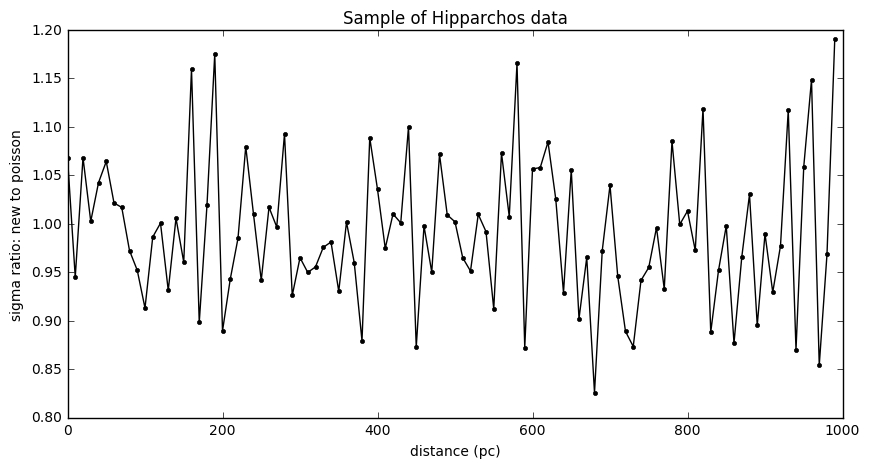

In [221]:
#------------------------------------Bootstrap sampling-----------------------------------------------------

# 1st decide how big sample of data will be, use np.random.choice(data, samplesize)

iterations = 100
samplesize = 10000
Nbins = len(bins1)

datalength = len(data)
bin_sample = np.linspace(0,1000,101)
bins = bin_sample[0:-1]
dmax_sample = np.max(bins); dmin_sample =np.min(bins)
binwidth_sample = np.float(dmax_sample-dmin_sample)/Nbins

sample = [] ; SCounts0 = np.empty((iterations,Nbins)); sample = np.empty((iterations,Nbins))
#sampling the data
for ii in range(0,Nbins):
    samp = np.random.choice(data,samplesize)
    sample_counts0 = np.histogram(samp, bin_sample)
#    SCounts0.append(sample_counts0)
    #sample.append(sample_counts[0]/ datalength/binwidth_sample)
#   sample.append(sample_counts)
    SCounts0[ii,:] = sample_counts0[0]/float(datalength)/binwidth_sample
    sample[ii,:] = sample_counts0[0]

#print SCounts0

new_sigma = np.std(SCounts0, axis=0) #error in sample

#poisson_sigma = np.sqrt(counts0)/float(datalength)/binwidth_sample

sigma_ratio = new_sigma/sigma #new error over original hipparcos error 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.plot(bins, sigma_ratio, color='black', marker = '.')
ax.set_title('Sample of Hipparchos data')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('sigma ratio: new to poisson')
plt.show()

From Day 3


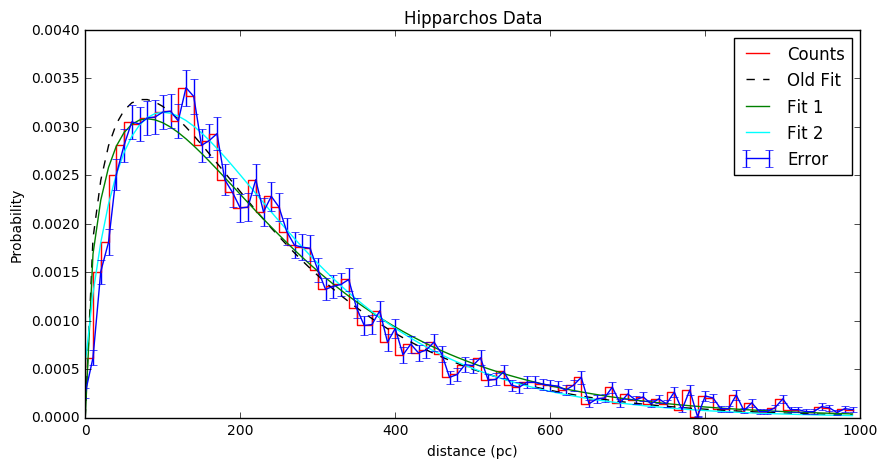

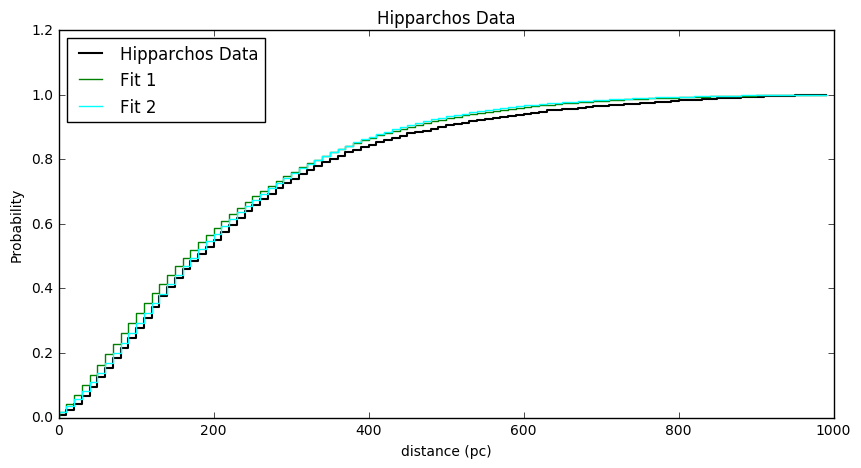

In [222]:
#-------------------------------------Making A Fake Hipparchos Data set-------------------------------------
print "From Day 3"
#Day 3 plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, counts_one_hundred, color = 'red', label='Counts')
ax.plot(bins1, normalized_y, color = 'black', label = 'Old Fit', linestyle='--')
ax.plot(bins1,norm_Y, color = 'green', label = 'Fit 1')
ax.plot(bins1,norm_Y2, color = 'cyan', label = 'Fit 2')
ax.errorbar(bins1, counts_one_hundred, yerr=sigma, color = 'blue', label='Error' )
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()


#Convert model (Y2) to cumuluative probability(np.cumsum(counts))
CumulSum = np.cumsum(counts)
CumulSum2 = np.cumsum(norm_Y2*binwidth)
CumulSum1 = np.cumsum(normalized_y*binwidth)
CumulSum_tentho = np.cumsum(normalized_y_tenthou*binwidth_tenthou)

#Cumulative Probabilities plot for original data, 1st and 2nd models
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)    # The big subplot
ax.step(bins1, CumulSum, color = 'black', label = 'Hipparchos Data', linewidth=1.5)
ax.step(bins1,CumulSum1, color = 'green', label = 'Fit 1')
ax.step(bins1,CumulSum2, color = 'cyan', label = 'Fit 2')
ax.legend(loc='best')
ax.set_xlabel('distance (pc)')
ax.set_ylabel('Probability')
ax.set_title('Hipparchos Data')
#ax.set_axis_bgcolor('black') #color the background
plt.show()



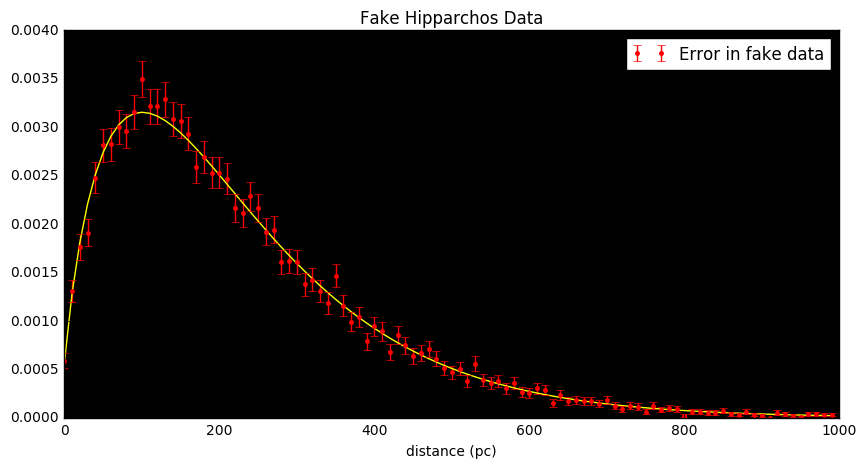

Chi Squared for fake data: 77.8168733419
Reduced Chi Squared for fake data: 0.778168733419


In [223]:
fake_data = np.random.uniform(0,1,10000) #create random 10,000 points

bins_tenthousand = np.linspace(0,1000, 10000) #10,000 bins

# print "10000 bins:", bins_tenthousand
# print""

bins_tenthousand_binwidth = (np.max(bins_tenthousand)-np.min(bins_tenthousand))/len(bins_tenthousand)
bins_tenthousand_center = bins_tenthousand+bins_tenthousand_binwidth #bins shifted by half a bin width

y_tenthou =(bins_tenthousand**P_best)*np.exp((-1.0*bins_tenthousand/DS_best))  # 2nd model with 10,000 bins
normalized_y_tenthou = y_tenthou/(np.sum(y_tenthou)*bins_tenthousand_binwidth) # used for more detailed results

CumulSum_tentho = np.cumsum(normalized_y_tenthou*bins_tenthousand_binwidth) #cumulative probability of 10,000 binned
#                                                                            2nd model

Pcum = CumulSum_tentho
# print "pcum:", Pcum
# print ""
dmodel = bins_tenthousand
drandom = dmodel[np.searchsorted(Pcum,fake_data)]
# print "fake distances:", drandom
# print ""
#print fake_data
#print drandom#; print np.min(drandom); print np.max(drandom)

fake_counts0 = np.histogram(drandom,bins0)
fake_datalength = len(drandom)*1.0
fake_counts = fake_counts0[0]/fake_datalength

# dmax_fake = np.max(fake_bins); dmin_fake =np.min(fake_bins)
fake_binwidth = np.float(dmax-dmin)/len(bins1)

# print "fake binwidth:",fake_binwidth
# print "fake_Counts:", fake_counts0[0]
# print ""
# print "bins", bins0
# print ""
fakecounts = fake_counts/fake_binwidth

N_tot3 = np.float(len(drandom))

sigma3 = fakecounts/np.sqrt(fake_counts0[0])


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111) 
ax.set_axis_bgcolor('black')
#plt.plot(bins1,fakecounts, marker='o', markersize=3)
ax.plot(bins1,norm_Y2, color='yellow')
ax.errorbar(bins1, fakecounts, yerr=sigma3, color = 'red', label='Error in fake data', fmt='.' )
ax.set_title('Fake Hipparchos Data')
ax.set_xlabel('distance (pc)')
ax.legend(loc='upper right')
plt.show()


# print "sigma3:", sigma3
# print ""
# print "fake data - model:", (fakecounts-norm_Y2)
#ChiSq3 = np.nanmean(np.sum((np.divide((fakecounts - norm_Y2),sigma3))**2))

diff = (fakecounts-norm_Y2); #diff = diff[-1:]
#sigma3 = sigma3[-1:]

# print "fake data:",fakecounts
# print "model", norm_Y2

#print di

#ChiSq3 = np.sum(np.nanmean((diff/sigma3)**2))
ChiSq3 = np.nansum((diff/sigma3)**2)


#ChiSq3 = stats.mstats.chisquare(fakecounts,norm_Y2,ddof=0)

print "Chi Squared for fake data:", ChiSq3
DOF3 = len(bins1) -0 #0 parameters?
print "Reduced Chi Squared for fake data:", ChiSq3/DOF3
#print "Reduced Chi Squared for fake data:", np.min(ChiSq3)

In [224]:
#----------------------------------------------Day 5-------------------------------------------------------------------
#Let's make a heat map like form Day 3

ds_new=np.linspace(1,250,500)
p_new =np.linspace(0,2,500); 
len(DS)

ChiSq_new = np.empty((ds_new.size,p_new.size)); 


for ii in range(len(ds_new)):
    for jj in range(len(p_new)):
        y_new = (bins1**(p_new[jj]))*np.exp((-1.0*bins1/(ds_new[ii])))
        norm_y_new = y_new/(np.sum(y_new)*binwidth)
        ChiSq_new[ii,jj] = (np.sum(((fakecounts - norm_y_new)/sigma)**2))
        
print "Minimum Chi Squared value for new model:", np.min(ChiSq_new)


Minimum Chi Squared value for new model: 200.032955155


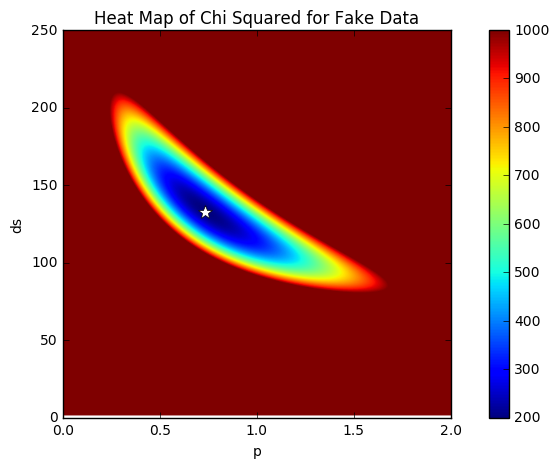

Minimum Chi Squared value for new model: 200.032955155
best DS value: 132.735470942
best P value: 0.733466933868


In [225]:
I,J = np.where(ChiSq_new==np.min(ChiSq_new))
#print i; print j

Y_NEW = (bins1**I)*np.exp((-1.0*bins1/J))
NORM_Y_NEW = Y_NEW/(np.sum(Y_NEW)*binwidth)

#plt.pcolormesh(x, y, intensity)
#plt.colorbar() #need a colorbar to show the intensity scale
#plt.show()
ds_best =ds_new[I[0]]; p_best=p_new[J[0]]


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
im = ax.imshow(ChiSq_new,extent=([p_new[0],p_new[-1],ds_new[0],ds_new[-1]]), aspect=0.008, vmin=200, vmax=1000, origin='lower')
fig.colorbar(im)
plt.plot(p_best,ds_best, markersize=10,color='white', marker='*')
plt.xlabel('p')
plt.ylabel('ds')
plt.title('Heat Map of Chi Squared for Fake Data')
plt.show()


print "Minimum Chi Squared value for new model:", np.min(ChiSq_new)
print "best DS value:", ds_best; print "best P value:", p_best


In [423]:
#--------------------------------------MCMC Algorithm----------------------------------------------------------------------------
#Let's use a one chain algorithm (Metropolis Hastings)
#make shit up

Nchain = 10000 #length of chain
A = np.empty(Nchain)
DS_mcmc = np.empty(Nchain)
P_mcmc = np.empty(Nchain)
ChiSq_mcmc = np.empty(Nchain)

P_mcmc[0] = 0.5
DS_mcmc[0] = 150

# from double for loop in heat map example
# y_new = (bins1**(p_new[jj]))*np.exp((-1.0*bins1/(ds_new[ii])))
# norm_y_new = y_new/(np.sum(y_new)*binwidth)
# ChiSq_new[ii,jj] = (np.sum(((fakecounts - norm_y_new)/sigma)**2))

#normalizeddata = counts/fakecounts
def get_chi2( p, ds, Bins, normalizedcounts, histogrammed_data ):
    y = (Bins**p)*np.exp(-Bins/float(ds))
    d_max = np.max(Bins)
    d_min =np.min(Bins)
    bin_width = np.float(d_max-d_min)/len(Bins)
    norm_y= y/(np.sum(y)*bin_width)
    sigma = normalizedcounts/np.sqrt(histogrammed_data[0])
    chi2 = (np.nansum(((normalizedcounts - norm_y)/sigma)**2))

    return chi2
    

ChiSq_mcmc[0] = get_chi2( P_mcmc[0], DS_mcmc[0], bins1, fakecounts, fake_counts0)

#DS_mcmc_step
#P_mcmc_step

for ii in range(1,Nchain):
    P_step = np.random.normal(loc=0,scale=0.1) #arguments (mean, sigma)
    DS_step= np.random.normal(loc=0,scale=10)

    DS_try = DS_mcmc[ii-1] + DS_step
    P_try = P_mcmc[ii-1] + P_step
    ChiSq_try = get_chi2(P_try, DS_try, bins1, fakecounts, fake_counts0)
    if ChiSq_try < ChiSq_mcmc[ii-1]:
        DS_mcmc[ii] = DS_try
        P_mcmc[ii] = P_try
        ChiSq_mcmc[ii] = ChiSq_try 
    else:
        R = np.random.uniform(0,1)
        if R < (np.exp((ChiSq_mcmc[ii-1]**2-ChiSq_try**2)/2.0)):
            DS_mcmc[ii] = DS_try
            P_mcmc[ii] = P_try
            ChiSq_mcmc[ii] = ChiSq_try 
        else:
            DS_mcmc[ii] = DS_mcmc[ii-1]
            P_mcmc[ii] = P_mcmc[ii-1]
            ChiSq_mcmc[ii] = ChiSq_mcmc[ii-1]


Chisq_mcmc: [ 287.92643091  287.92643091  180.87345781 ...,  136.58440172  136.58440172
  136.58440172]
Chisq_mcmc minimum: 136.584401722

Average of P_mcmc: 0.775021297436
best fit P: 0.821643286573

Average of DS_mcmc: 128.116819383
best fit DS: 128.244488978


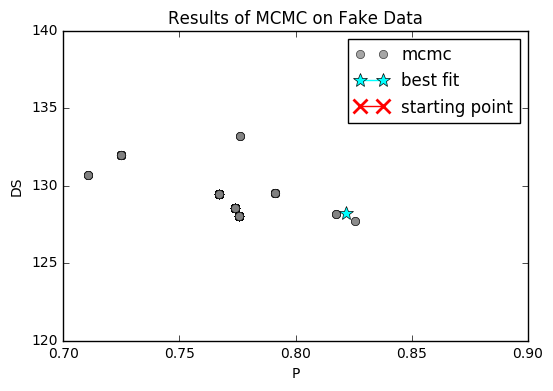

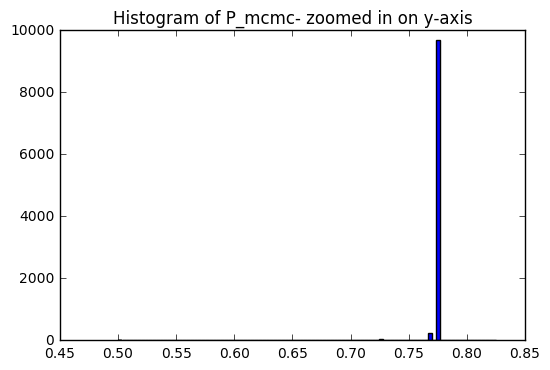

In [424]:
print "Chisq_mcmc:", ChiSq_mcmc    

print "Chisq_mcmc minimum:", np.min(ChiSq_mcmc)
print""
print "Average of P_mcmc:", np.mean(P_mcmc)
print "best fit P:", P_best
print""
print "Average of DS_mcmc:", np.mean(DS_mcmc)
print "best fit DS:", DS_best

plt.plot(P_mcmc,DS_mcmc, marker='o', linestyle='none', label='mcmc',alpha=0.7, color='grey' )
plt.plot(P_best,DS_best, marker = "*", color='cyan', markersize=10, label='best fit')
plt.plot(0.5,150,marker = "x", color='red', markersize=10, label='starting point', mew=2)
#plt.plot(P_mcmc[-1],DS_mcmc[-1], marker ="+", color='pink', markersize=10, label='ending point', mew=2)
plt.xlabel('P')
plt.ylabel('DS')
plt.title('Results of MCMC on Fake Data')
plt.legend(loc='best')
plt.xlim(0.7,0.9)
plt.ylim(120,140)
plt.show()

#P_chain = np.sort(P_mcmc); DS_chain = np.sort(DS_mcmc)
plt.hist(P_mcmc,bins=100)
#plt.ylim(0,70)
plt.title('Histogram of P_mcmc- zoomed in on y-axis')
plt.show()

#^^^^^^ THIS ISN"T QUITE RIGHT. SOMETHING IS SORT OF WRONG HERE.